In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa
from librosa.core import audio
import librosa.display
import IPython.display as  ipd
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
data_path = ".../Data"
print(list(os.listdir(f'{data_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'reggae', 'pop', 'rock', '.DS_Store']


Load in one reggae genre song and have an intial look at its shape and length of the song

In [4]:
y, sr = librosa.load(f'{data_path}/genres_original/reggae/reggae.00036.wav')
print('y: ',y,'\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (kHz):', sr, '\n')

#Verify the length of the audio
print('Check Len of Audio:', str(round(len(y)/sr)))

y:  [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (kHz): 22050 

Check Len of Audio: 30


Librosa load the song in as an 1D array with the length of 661794. The song is 30 seconds long with the total of 22050 kHz.

Removing any silence before and after the actual audio to ensure that we are only working with the music.

In [5]:
#Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

#The result is an numpy ndaaray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


The audio shape remains after trimming, so there is no silence before and after audio

Let take a look at the sound waves for the song.

Text(0.5, 1.0, 'Sound Waves in Reggae 36')

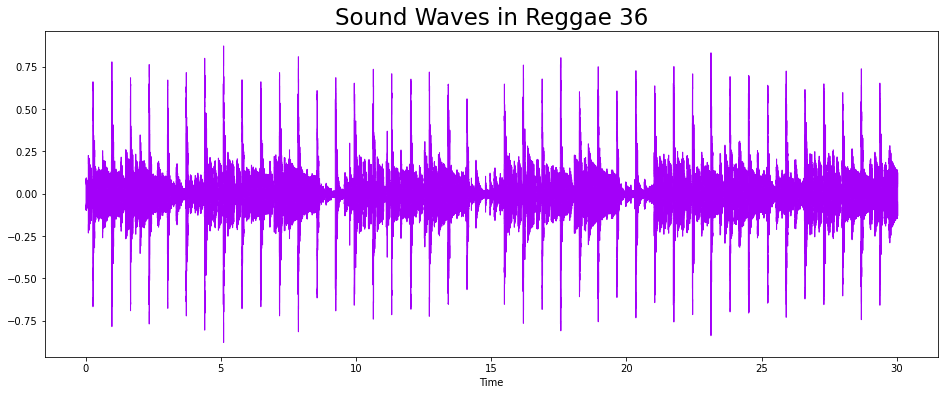

In [11]:
plt.figure(figsize = (16,6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize = 23)

## Spectrogram

One of the way to visualize audio data is to use spectrogram, or sometimes called sonographs, voiceprints, or voicegram. A spectrogram is a visual way of representing the signal strength, or "loudness", of a signal over time at various frequencies present in a particular waveform. Generally, spectrogram have two-dimensions. Time runs from oldest to youngest along the horizontal axis. The vertical axis represents frequency, or can be thought as pitch or tone, with the lowest frequencies at the bottom and the highest frequencies at the top. The third dimension is the amplitude (energy, or "loudness") of a particular frequency at a particular time is represented by color, with dark blues corresponding to low amplitudes and brighter colors corresponding to progressively stronger (or louder) amplitudes.

Text(0.5, 1.0, 'Reggae 36 Spectrogram')

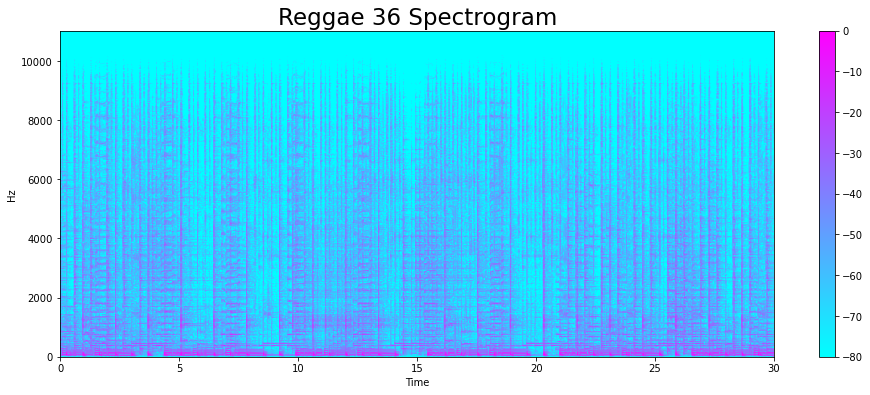

In [17]:
#Default FFT window size
n_fft = 2048 #FFT window size
hop_length = 512 #number audio of frames between STFT columns (looks like a good default)

#Short-time Fourier Tranform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

#Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

#Creating the spectrogram
plt.figure(figsize = (16,6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'hz', cmap = 'cool')
plt.colorbar();
plt.title("Reggae 36 Spectrogram",fontsize = 23)

In the figure above, the vertical axis show the frequency from 0 to 10,000 Hz, and the horizontal axis show the time of the song (30 seconds). Note that all of the high amplitude (loudness) are tend to lean toward the lower frequency. Let take the logarithmic of the frequency, this is also called Mel Spectrograms.

Text(0.5, 1.0, 'Reggae 36 Mel Spectrogram')

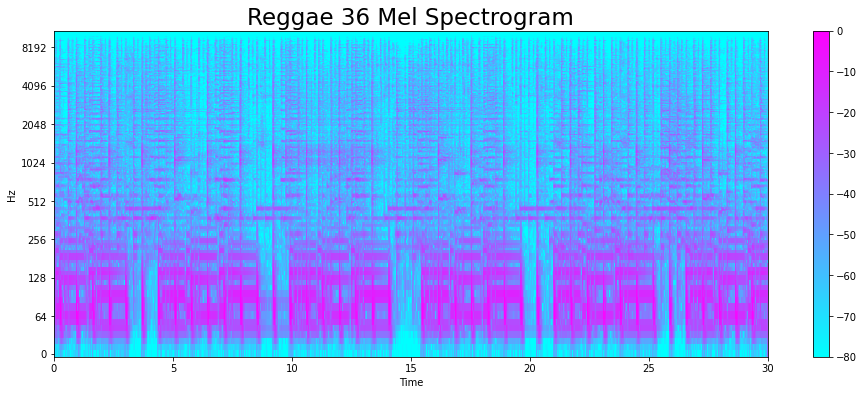

In [14]:
plt.figure(figsize = (16,6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool');
plt.colorbar();
plt.title("Reggae 36 Mel Spectrogram",fontsize = 23)

## Zero-Crossing Rate

Zero-crossing is an instantaneous point at which the sign of a mathematical function changes (e.g. from positive to negative). Zero-cross rate (ZCR) is the rate at which a signal transitions from positive to negative, and vice versa. Its value has been extensively used in both speech recognition, and music information retrieval for classifying percussive sounds.

Let take a look at the small segment of the signal to identify the ZCR.

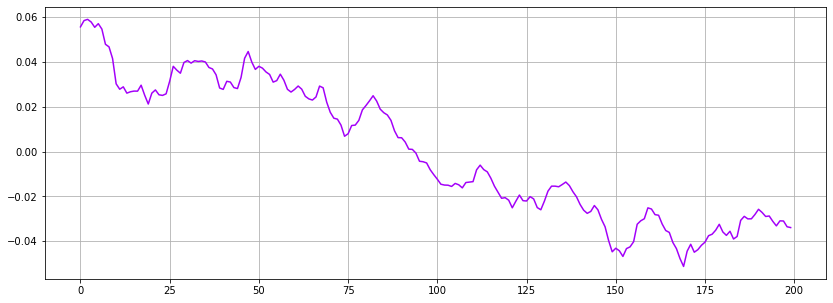

In [36]:
n0 = 9000
n1 = 9200
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1], color = "#A300F9")
plt.grid()

From the figure above, the signal transition from positive to negative only one time, thus the zero-crossing is 1. Let us verify it with librosa builting function to calculate the zero-crossing.

In [41]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad = False)
print('Number of zero-crossing: '+str(sum(zero_crossings)))

Number of zero-crossing: 1


Let see how many total zero-crossing for our 1 song (30 seconds).

In [40]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad = False)
print('Total number of zero-crossing for reggae 36: '+str(sum(zero_crossings)))

Total number of zero-crossing for reggae 36: 39232


## Harmonics and Percussive Components

There are 2 components in sound, harmonic and percussive. Harmonic is what perceive as pitched sound like melodies and chords. Percussive sound is noise-like such as the hit on a drum, or from consonants in speech. Following is the two components for the Reggae 36.



Text(0.5, 1.0, 'Harmonic and Percussive Components in Reggae 36')

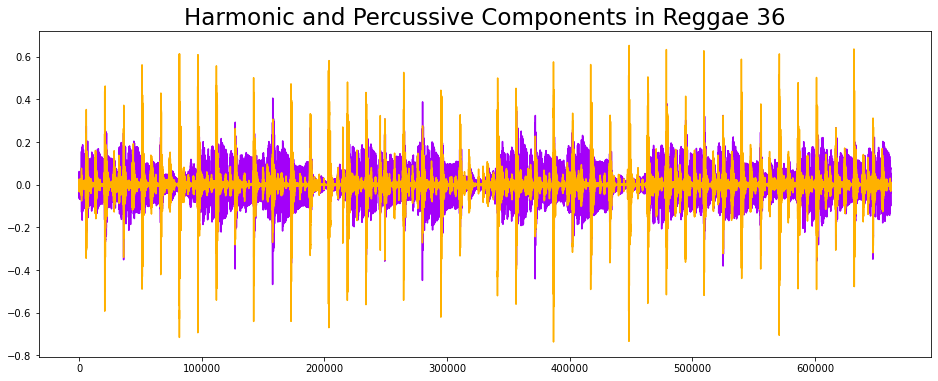

In [45]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16,6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.title("Harmonic and Percussive Components in Reggae 36", fontsize = 23)

The harmonic component is shown in purple, and it stays around the center. The percussive component is shown in yellow and it tends to be toward both ends.

## Tempo BPM

In [7]:
tempo, _ = librosa.beat.beat_track(y, sr=sr)
tempo

86.1328125

## Spectral Centroid

The spectral centroid indicates where the center of mass of the spectrum is located. It is calculated as a weighted mean of the frequencies present in the signal.

Centroids: [1758.29476432 1946.74243678 2038.8113414  ...  766.50416352 1041.07728901
 1391.05145642] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


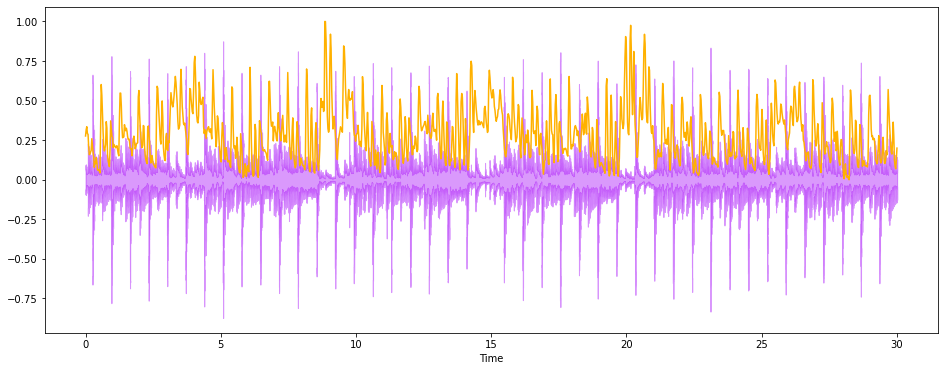

In [11]:
# Calculate the spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr = sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:',t)

# Function that normalizes the Sound Data
def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16,6))
librosa.display.waveshow(audio_file, sr = sr, alpha = 0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color = '#FFB100')

The spectrum centroid is show with the colow yellow on the plot above.

## Spectral Rolloff

The spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies.

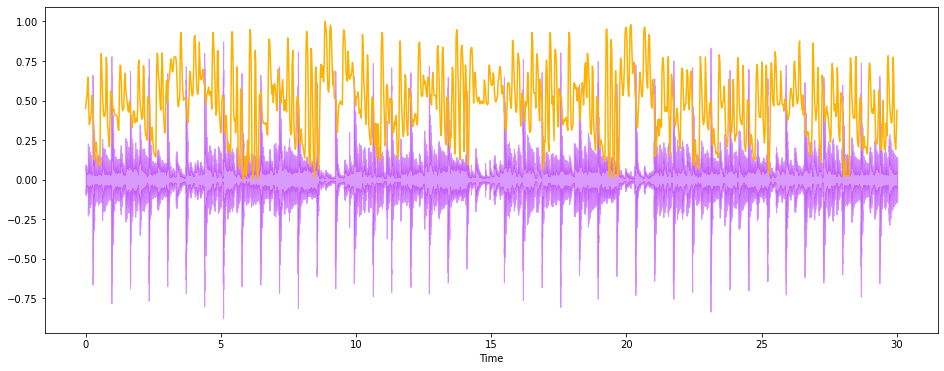

In [13]:
# Spectral Rolloff vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr = sr)[0]

# The plot
plt.figure(figsize = (16,6))
librosa.display.waveshow(audio_file, sr = sr, alpha = 0.4, color = '#A300F9')
plt.plot(t, normalize(spectral_rolloff), color = '#FFB100')

## Mel-Frequency Cepstral Coefficient (MFCC)

The mel frequency cepstral coefficients of a signal are a small set of features (usually above 10-20) which concisely describe the overall shape of the spectral enevelope.

mfccs shape: (20, 1293)


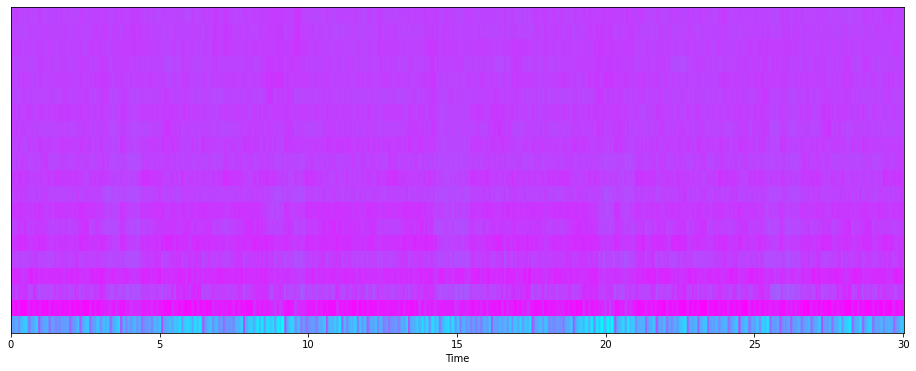

In [14]:
mfccs = librosa.feature.mfcc(audio_file, sr = sr)
print('mfccs shape:', mfccs.shape)

#Display the MFCCs:
plt.figure(figsize = (16,6))
librosa.display.specshow(mfccs, sr = sr, x_axis = 'time', cmap = 'cool');

Since most of its value lies toward the bottom of the graph, let rescale it to make the mean of 0 and variance of 1.

Mean: -2.5077282e-09 

Var: 1.0000001


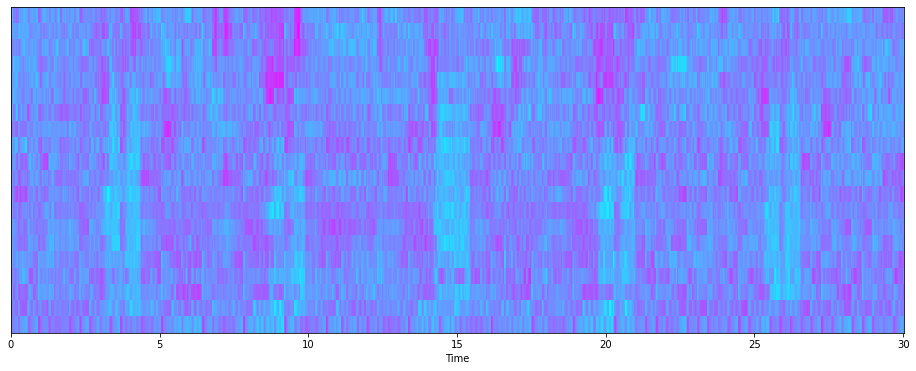

In [15]:
#Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis = 1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16,6))
librosa.display.specshow(mfccs, sr = sr, x_axis = 'time', cmap = 'cool');

## Chroma Frequencies

Chroma feature or chromagram closely relates to the twelve different pitch classes, it is very powerful representation for music audio in which the entire spectrum is projected into 12 bins representing the 12 disctinct semitones of the musical octave

Chromogram shape: (12, 133)


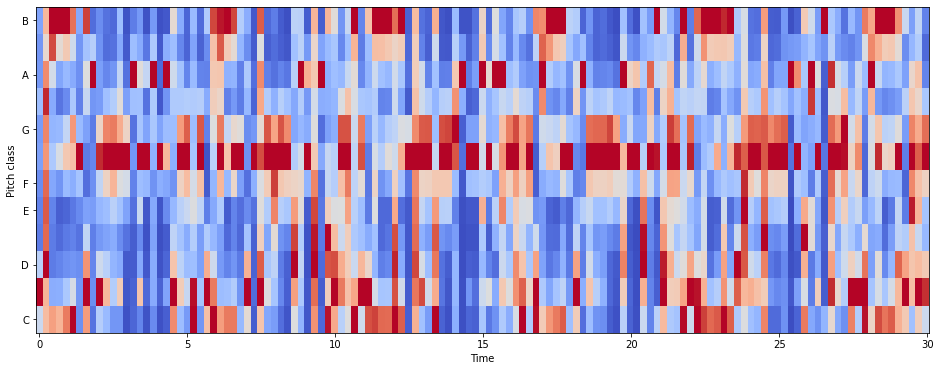

In [16]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr = sr, hop_length = hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize = (16,6))
librosa.display.specshow(chromagram, x_axis = 'time', y_axis = 'chroma', hop_length = hop_length, cmap='coolwarm');

## Summary and Next Steps

Librosa is very powerful tool to extract audio features such as:
* Zero-crossing rate (ZCR)
* Harmonics and Percussive
* Tempo BMP
* Spectral Centroid
* Spectral Rolloff
* Mel-Frequency Cepstral Coefficients
* Chroma Frequency

Addition to these features, Echonest (now Spotify) also provided other useful features as below:
* energy: the higher the value the more energetic
* danceability: the higher the value, the easier it is to dance to this song
* dB (loudness): the higher the value, the louder the song
* liveness: the higher the value, the more likely the song is a live recording
* valence: the higher the value, the more positive mood for the song
* duration: the length of the song
* acousticness: the higher the value, the more acoustic the song is
* speechiness: the higher the value, the more spoken word the song contains
* popularity: the higher the value, the more popular the song is

Let combine all of these features to build a genre classification and song recommendation.